## Main Effects Questions:
- 1. Does vitamin C supplementation significantly affect tooth growth?

> Is there a statistically significant overall effect?

- 2. Does the delivery method (OJ vs VC) significantly impact tooth growth?

> Is orange juice more effective than pure ascorbic acid?

- 3. Does the dose level (0.5, 1, 2 mg/day) significantly affect tooth growth?

> Is there a dose-response relationship?

## Interaction Questions:
- 4. Is there an interaction between delivery method and dose?

> Does the effect of delivery method depend on the dose level?

> Does the dose-response relationship differ between OJ and VC?

## Assumption Checking Questions:
- 5. Is the data normally distributed within each group?

> Shapiro-Wilk tests

> QQ plots

- 6. Is homogeneity of variance satisfied?

> Levene's test

> Bartlett's test

- 7. Are there any outliers influencing the results?

- 8. Is the sample size adequate for the tests being used?

## Statistical Significance Questions:
- 9. What is the p-value for each main effect and interaction?

- 10. Which group differences are statistically significant (α=0.05)?

- 11. Are the results robust after multiple comparison corrections?

## 1. Libraries

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 2. Dataset

In [20]:
import pandas as pd
import numpy as np


In [22]:
df = pd.read_excel('Toothgrowthdata.xlsx', sheet_name='Toothgrowthdata')
df

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5
5,10.0,VC,0.5
6,11.2,VC,0.5
7,11.2,VC,0.5
8,5.2,VC,0.5
9,7.0,VC,0.5


In [13]:

print("Dataset Overview:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nBasic info:")
print(df.info())

Dataset Overview:
    len supp  dose
0   4.2   VC   0.5
1  11.5   VC   0.5
2   7.3   VC   0.5
3   5.8   VC   0.5
4   6.4   VC   0.5

Dataset shape: (60, 3)

Data types:
len     float64
supp     object
dose    float64
dtype: object

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   len     60 non-null     float64
 1   supp    60 non-null     object 
 2   dose    60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB
None


## 3. Descriptive Statistic

In [14]:
print("=== DESCRIPTIVE STATISTICS ===")

# Overall statistics
print("\n1. OVERALL TOOTH LENGTH STATISTICS:")
overall_stats = df['len'].describe()
print(overall_stats)

# Statistics by supplement type
print("\n2. STATISTICS BY SUPPLEMENT TYPE:")
supplement_stats = df.groupby('supp')['len'].agg(['count', 'mean', 'std', 'min', 'max', 'median'])
print(supplement_stats)

# Statistics by dose level
print("\n3. STATISTICS BY DOSE LEVEL:")
dose_stats = df.groupby('dose')['len'].agg(['count', 'mean', 'std', 'min', 'max', 'median'])
print(dose_stats)

# Combined statistics by supplement and dose
print("\n4. COMBINED STATISTICS BY SUPPLEMENT AND DOSE:")
combined_stats = df.groupby(['supp', 'dose'])['len'].agg(['count', 'mean', 'std', 'min', 'max', 'median'])
print(combined_stats)

=== DESCRIPTIVE STATISTICS ===

1. OVERALL TOOTH LENGTH STATISTICS:
count    60.000000
mean     18.813333
std       7.649315
min       4.200000
25%      13.075000
50%      19.250000
75%      25.275000
max      33.900000
Name: len, dtype: float64

2. STATISTICS BY SUPPLEMENT TYPE:
      count       mean       std  min   max  median
supp                                               
OJ       30  20.663333  6.605561  8.2  30.9    22.7
VC       30  16.963333  8.266029  4.2  33.9    16.5

3. STATISTICS BY DOSE LEVEL:
      count    mean       std   min   max  median
dose                                             
0.5      20  10.605  4.499763   4.2  21.5    9.85
1.0      20  19.735  4.415436  13.6  27.3   19.25
2.0      20  26.100  3.774150  18.5  33.9   25.95

4. COMBINED STATISTICS BY SUPPLEMENT AND DOSE:
           count   mean       std   min   max  median
supp dose                                            
OJ   0.5      10  13.23  4.459709   8.2  21.5   12.25
     1.0      10  22.

## 4. Data Visualization

=== DATA VISUALIZATION ===


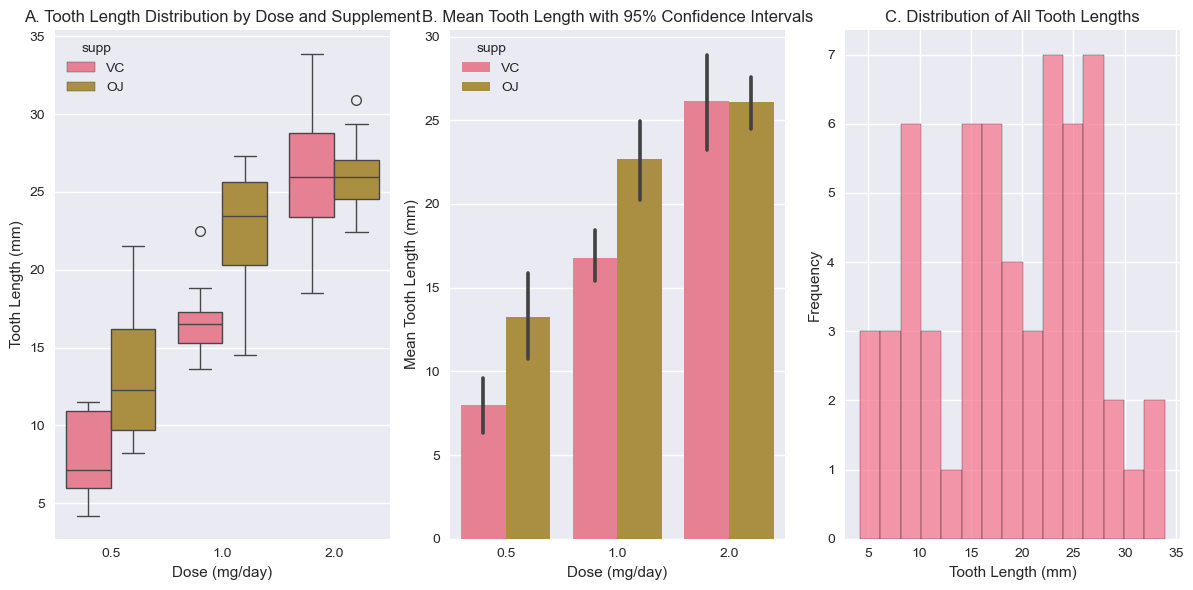

In [15]:
print("=== DATA VISUALIZATION ===")

# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# 1. Boxplot by supplement and dose
sns.boxplot(data=df, x='dose', y='len', hue='supp', ax=axes[0])
axes[0].set_title('A. Tooth Length Distribution by Dose and Supplement')
axes[0].set_xlabel('Dose (mg/day)')
axes[0].set_ylabel('Tooth Length (mm)')

# 3. Bar plot with confidence intervals
sns.barplot(data=df, x='dose', y='len', hue='supp', ax=axes[1], ci=95)
axes[1].set_title('B. Mean Tooth Length with 95% Confidence Intervals')
axes[1].set_xlabel('Dose (mg/day)')
axes[1].set_ylabel('Mean Tooth Length (mm)')

# 5. Histogram of tooth lengths
df['len'].hist(bins=15, ax=axes[2], alpha=0.7, edgecolor='black')
axes[2].set_title('C. Distribution of All Tooth Lengths')
axes[2].set_xlabel('Tooth Length (mm)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

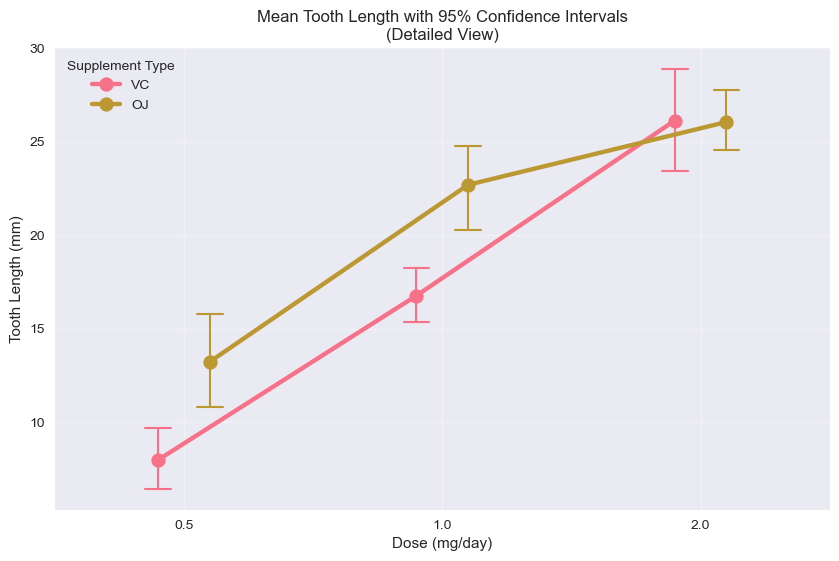

In [16]:
# Additional detailed plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dose', y='len', hue='supp',
              ci=95, dodge=0.2, capsize=0.1, errwidth=1.5)
plt.title('Mean Tooth Length with 95% Confidence Intervals\n(Detailed View)')
plt.xlabel('Dose (mg/day)')
plt.ylabel('Tooth Length (mm)')
plt.legend(title='Supplement Type')
plt.grid(True, alpha=0.3)
plt.show()

## Assumption Checking For Statistical Tests

=== ASSUMPTION CHECKING ===

1. NORMALITY TESTS (Shapiro-Wilk):
H₀: Data is normally distributed
H₁: Data is not normally distributed
α = 0.05
OJ - 0.5mg: W=0.8927, p=0.1820 (Normal)
OJ - 1.0mg: W=0.9266, p=0.4153 (Normal)
OJ - 2.0mg: W=0.9626, p=0.8148 (Normal)
VC - 0.5mg: W=0.8900, p=0.1696 (Normal)
VC - 1.0mg: W=0.9083, p=0.2698 (Normal)
VC - 2.0mg: W=0.9733, p=0.9194 (Normal)

2. HOMOGENEITY OF VARIANCE TESTS:
Levene's test (between supplements): F=1.2136, p=0.2752
Levene's test (between doses): F=0.6457, p=0.5281


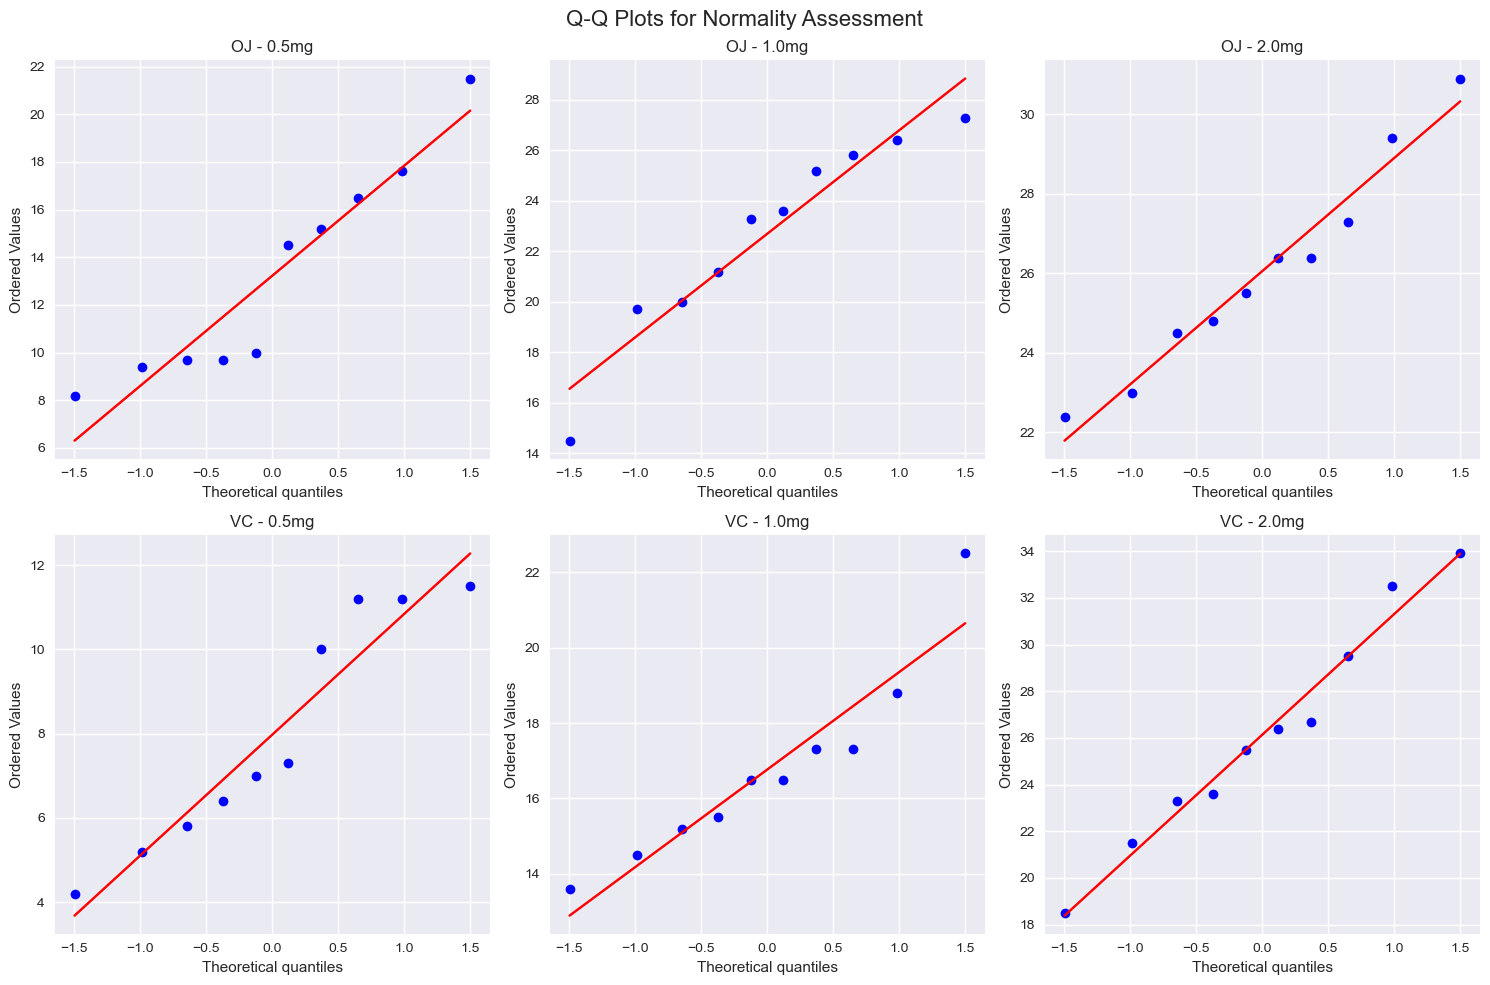

In [17]:
print("=== ASSUMPTION CHECKING ===")

# 1. Normality tests using Shapiro-Wilk
print("\n1. NORMALITY TESTS (Shapiro-Wilk):")
print("H₀: Data is normally distributed")
print("H₁: Data is not normally distributed")
print("α = 0.05")

for supp in ['OJ', 'VC']:
    for dose in [0.5, 1.0, 2.0]:
        group_data = df[(df['supp'] == supp) & (df['dose'] == dose)]['len']
        stat, p_value = stats.shapiro(group_data)
        normality = "Normal" if p_value > 0.05 else "Not Normal"
        print(f"{supp} - {dose}mg: W={stat:.4f}, p={p_value:.4f} ({normality})")

# 2. Homogeneity of variance tests
print("\n2. HOMOGENEITY OF VARIANCE TESTS:")

# Levene's test between supplements
levene_supp_stat, levene_supp_p = stats.levene(
    df[df['supp'] == 'OJ']['len'],
    df[df['supp'] == 'VC']['len']
)
print(f"Levene's test (between supplements): F={levene_supp_stat:.4f}, p={levene_supp_p:.4f}")

# Levene's test between doses
dose_groups = [df[df['dose'] == dose]['len'] for dose in [0.5, 1.0, 2.0]]
levene_dose_stat, levene_dose_p = stats.levene(*dose_groups)
print(f"Levene's test (between doses): F={levene_dose_stat:.4f}, p={levene_dose_p:.4f}")

# 3. QQ plots for normality check
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Q-Q Plots for Normality Assessment', fontsize=16)

plot_idx = 0
for supp in ['OJ', 'VC']:
    for dose in [0.5, 1.0, 2.0]:
        group_data = df[(df['supp'] == supp) & (df['dose'] == dose)]['len']
        stats.probplot(group_data, dist="norm", plot=axes[plot_idx//3, plot_idx%3])
        axes[plot_idx//3, plot_idx%3].set_title(f'{supp} - {dose}mg')
        plot_idx += 1

plt.tight_layout()
plt.show()

## 5. Inferential Statistic

In [18]:
# Calculate confidence intervals
print("\n5. 95% CONFIDENCE INTERVALS:")
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean - h, mean + h

print("Confidence intervals for each group:")
for supp in ['OJ', 'VC']:
    for dose in [0.5, 1.0, 2.0]:
        group_data = df[(df['supp'] == supp) & (df['dose'] == dose)]['len']
        ci_lower, ci_upper = confidence_interval(group_data)
        print(f"{supp} - {dose}mg: ({ci_lower:.2f}, {ci_upper:.2f})")


5. 95% CONFIDENCE INTERVALS:
Confidence intervals for each group:
OJ - 0.5mg: (10.04, 16.42)
OJ - 1.0mg: (19.90, 25.50)
OJ - 2.0mg: (24.16, 27.96)
VC - 0.5mg: (6.02, 9.94)
VC - 1.0mg: (14.97, 18.57)
VC - 2.0mg: (22.71, 29.57)


In [19]:
print("=== INFERENTIAL STATISTICS ===")

# 1. T-tests for supplement comparison
print("\n1. T-TESTS FOR SUPPLEMENT COMPARISON:")

# Independent t-test between all OJ vs VC
oj_data = df[df['supp'] == 'OJ']['len']
vc_data = df[df['supp'] == 'VC']['len']

t_stat, p_value = stats.ttest_ind(oj_data, vc_data)
print(f"Overall OJ vs VC: t({len(oj_data)+len(vc_data)-2}) = {t_stat:.4f}, p = {p_value:.4f}")

# T-tests at each dose level
print("\nT-tests at each dose level:")
for dose in [0.5, 1.0, 2.0]:
    oj_dose = df[(df['supp'] == 'OJ') & (df['dose'] == dose)]['len']
    vc_dose = df[(df['supp'] == 'VC') & (df['dose'] == dose)]['len']
    t_stat, p_value = stats.ttest_ind(oj_dose, vc_dose)
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"Dose {dose}mg: t({len(oj_dose)+len(vc_dose)-2}) = {t_stat:.4f}, p = {p_value:.4f} {significance}")
# # 2. One-way ANOVA for dose effect
# print("\n2. ONE-WAY ANOVA FOR DOSE EFFECT:")
# f_stat, p_value = stats.f_oneway(
#     df[df['dose'] == 0.5]['len'],
#     df[df['dose'] == 1.0]['len'],
#     df[df['dose'] == 2.0]['len']
# )
# print(f"One-way ANOVA (dose): F(2,57) = {f_stat:.4f}, p = {p_value:.4f}")

# # 3. Two-way ANOVA
# print("\n3. TWO-WAY ANOVA:")
# model = ols('len ~ C(supp) + C(dose) + C(supp):C(dose)', data=df).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# print("Two-way ANOVA table:")
# print(anova_table)

=== INFERENTIAL STATISTICS ===

1. T-TESTS FOR SUPPLEMENT COMPARISON:
Overall OJ vs VC: t(58) = 1.9153, p = 0.0604

T-tests at each dose level:
Dose 0.5mg: t(18) = 3.1697, p = 0.0053 **
Dose 1.0mg: t(18) = 4.0328, p = 0.0008 ***
Dose 2.0mg: t(18) = -0.0461, p = 0.9637 ns
